In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
import pandas as pd

In [2]:
df = pd.read_csv("Data/triple_data_ill.csv")
df.head()

,BH1_ID1,BH1_ID2,BH2_ID1,BH2_ID2,M1_bin_1,M2_bin_1,M1_bin_2,M2_bin_2,t1,t2,tmerger
0,9.223372e+18,9.223372e+18,9.223372036720252e+18,9.223372e+18,3.286581e+07,1.253781e+07,5.276829e+07,8.204738e+06,2.055999e+09,1.988185e+09,1.985633e+09
1,9.223372e+18,9.223372e+18,3.4025088817218365e+18,9.223372e+18,1.059404e+07,2.885124e+06,3.132749e+08,4.211761e+07,3.255727e+11,7.265512e+09,5.529691e+09
2,9.223372e+18,9.223372e+18,9.223372036820334e+18,9.223372e+18,1.655162e+07,6.537747e+06,7.257406e+07,4.653945e+07,5.274952e+10,1.032617e+10,3.025313e+09
3,9.223372e+18,9.223372e+18,9.223372037107667e+18,9.223372e+18,1.259004e+07,3.439988e+06,2.386990e+07,2.216544e+06,5.883422e+09,1.284130e+12,1.972738e+09
4,9.223372e+18,9.223372e+18,9.223372037499791e+18,9.223372e+18,1.325181e+08,1.408275e+07,4.551391e+08,1.002870e+06,1.206497e+10,7.389760e+09,4.814316e+09


Seperating the BH IDs and Masses of each BH in the triple from the .csv file.

In [195]:
mID11 = df["BH1_ID1"].to_numpy() #ID of 1st BH in the first binary
mID12 = df["BH1_ID2"].to_numpy() #ID of 2nd BH in the first binary
mID21 = df["BH2_ID1"].to_numpy()
mID22 = df["BH2_ID2"].to_numpy()

In [196]:
b1_m1 = df["M1_bin_1"].to_numpy() #mass of 1st BH in the first binary
b1_m2 = df["M2_bin_1"].to_numpy() #mass of 2nd BH in the first binary
b2_m1 = df["M1_bin_2"].to_numpy()
b2_m2 = df["M2_bin_2"].to_numpy()

In [197]:
Ntriple = np.size(mID11)
print(Ntriple)

531


In [198]:
m1_list = []
m2_list = []
m3_list = []

In [199]:
for i in range(Ntriple):

    
    if(mID11[i]==mID21[i]):
        
        m2 = b2_m1[i]
        m2_old = b1_m1[i]
        qin_old = b1_m2[i]/m2_old
        m1 = qin_old * m2
        m3 = b2_m2[i]
        
    
    elif(mID12[i]==mID21[i]):
                                                     
        m2 = b2_m1[i]
        m2_old = b1_m2[i]
        qin_old = b1_m2[i]/m2_old
        m1 = qin_old * m2
        m3 = b2_m2[i]        
    
    elif(mID11[i]==mID22[i]):

        m2 = b2_m2[i]
        m2_old = b1_m1[i]
        qin_old = b1_m2[i]/m2_old
        m1 = qin_old * m2
        m3 = b2_m1[i]
    
    elif(mID12[i]==mID22[i]):
        m2 = b2_m2[i]
        m2_old = b1_m2[i]
        qin_old = b1_m1[i]/m2_old
        m1 = qin_old * m2
        m3 = b2_m1[i]   
        
    m1_list.append(m1)
    m2_list.append(m2)
    m3_list.append(m3)

In [200]:
m1_list = np.array(m1_list)
m2_list = np.array(m2_list)
m3_list = np.array(m3_list)

In [201]:
M1 = m1_list
qin = m2_list/m1_list
qout = m3_list/(m1_list + m2_list)

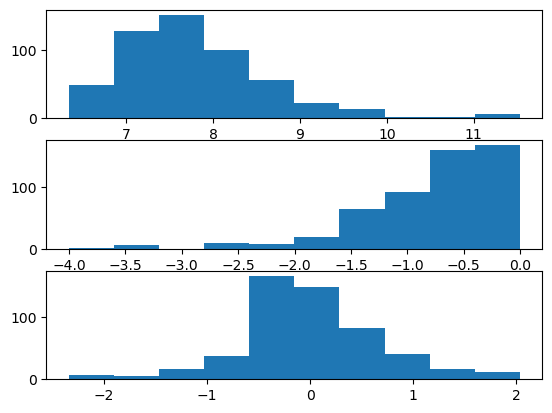

In [202]:
fig,ax=plt.subplots(3,1)
ax[0].hist(np.log10(M1))
ax[1].hist(np.log10(qin))
ax[2].hist(np.log10(qout))
plt.show()

## Merger time and redshift


The merger time is approximated as the time of triple formation here. This is because the time taken for triple to form >> when they merge.

Can we prove this by calculations ?

In [211]:
#t_bh = np.loadtxt("Data/t_merger2.txt")

In [212]:
t_triple = df["tmerger"].to_numpy()

In [85]:
# importing the time of triple formation/mergers
#t_bh = np.loadtxt("Data/triple_times.txt")

In [213]:
column_name = ['M1','qin','qout','t_triple']
df = pd.DataFrame({'M1': M1,'qin': qin, 'qout': qout, 't_triple' : t_triple},columns=column_name)
df.to_csv('Data/Triple-mass-merger_time.csv')

In [214]:
t_hubble = 13.7688 * 10**9

In [216]:
np.size(np.argwhere(t_triple>t_hubble))

0

In [51]:
z_bh = np.array(z_bh)

In [20]:
np.max(z_bh)

3.2761646414750767

In [23]:
np.size(z_bh)

531

In [24]:
import pandas as pd

In [27]:
column_name = ['M1','qin','qout','t_triple','z_triple']

In [33]:
df = pd.DataFrame({'M1': M1,'qin': qin, 'qout': qout, 't_triple' : t_bh, 'z_triple' : z_bh},columns=column_name)

In [35]:
df.to_csv('Data/Triple-mass-redshift.csv')